# Importing Required Libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)
 
# statistical analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing the dataset

In [2]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('https://query.data.world/s/xlh353wvypzveoxm7h4u4c6hnucftk',encoding = 'ISO-8859-1')
pd.set_option('display.max_columns', 999)
raw_data.tail()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,41.1,48.8,"Ellsworth County, Kansas",2.08,51.0,20.9,27.9,NaN,8.4,32.2,15.2,51.7,4.3,78.3,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,29.3,31.4,"Finney County, Kansas",2.90,52.6,26.7,33.9,35.6,3.8,23.1,12.4,70.1,4.6,64.5,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,30.5,31.2,"Ford County, Kansas",3.04,54.8,19.7,44.5,33.3,2.5,23.0,12.8,64.8,6.4,62.0,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,36.9,40.5,"Franklin County, Kansas",2.56,58.8,10.9,37.2,NaN,4.1,36.1,14.4,NaN,6.9,75.9,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938
3046,1962.667684,48,213.6,453.549422,41193,37030,13.9,0.000000,"(40362.7, 42724.4]",26.2,25.5,27.0,"Geary County, Kansas",2.83,59.5,8.0,43.3,43.9,4.8,29.8,13.7,48.8,9.2,76.1,60.3,22.9,25.1,12.6,70.098132,16.590100,3.177753,1.356457,56.040242,8.981723


In [3]:
raw_data.shape

(3047, 34)

# Data Types and Missing Values

In [4]:
# Checking the column data types and non-missing values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [5]:
# Statistics for each column
raw_data.describe(include='all')

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047,3047.000000,3047.000000,3047.000000,3047,3047.000000,3047.000000,3047.000000,3047.000000,762.000000,3047.000000,3047.000000,3047.000000,2895.000000,3047.000000,3047.000000,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,3047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(45201, 48021.6]",NaN,NaN,NaN,"Robertson County, Tennessee",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,306,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,NaN,45.272333,39.570725,42.145323,NaN,2.479662,51.773679,18.224450,35.002068,40.977034,6.158287,34.804660,13.282015,54.152642,7.852412,64.354939,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,NaN,45.304480,5.226017,5.292849,NaN,0.429174,6.896928,8.093064,9.069722,11.115805,4.529059,7.034924,5.394756,8.315064,3.452371,10.647057,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,NaN,22.300000,22.400000,22.300000,NaN,0.022100,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,17.600000,0.400000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,NaN,37.700000,36.350000,39.100000,NaN,2.370000,47.750000,12.800000,29.200000,34.000000,3.100000,30.400000,9.400000,48.600000,5.500000,57.200000,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,NaN,41.000000,39.600000,42.400000,NaN,2.500000,52.400000,17.100000,34.700000,40.400000,5.400000,35.300000,12.300000,54.500000,7.600000,65.100000,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,NaN,44.000000,42.500000,45.300000,NaN,2.630000,56.400000,22.700000,40.700000,46.400000,8.200000,39.650000,16.100000,60.300000,9.700000,72.100000,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677


# Treating Missing Values

This function calculates the number of missing values and it's percentage for each column

In [6]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
missing_values_table(raw_data)

Your selected dataframe has 34 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
PctSomeCol18_24,2285,75.0
PctPrivateCoverageAlone,609,20.0
PctEmployed16_Over,152,5.0


In [8]:
# Get the columns with > 50% missing
missing_df = missing_values_table(raw_data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 34 columns.
There are 3 columns that have missing values.
We will remove 1 columns.


In [9]:
# Drop the columns
data = raw_data.drop(columns = list(missing_columns))

# Data Analysis

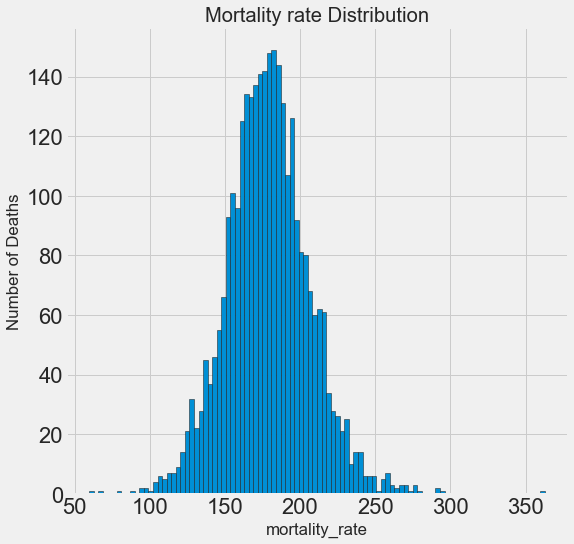

In [10]:
figsize(8, 8)

# Rename the score 
data = data.rename(columns = {'TARGET_deathRate': 'mortality_rate'})

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['mortality_rate'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('mortality_rate'); plt.ylabel('Number of Deaths'); 
plt.title('Mortality rate Distribution');

# Univariate Analysis

Boxplots to check for outliers for the target variable

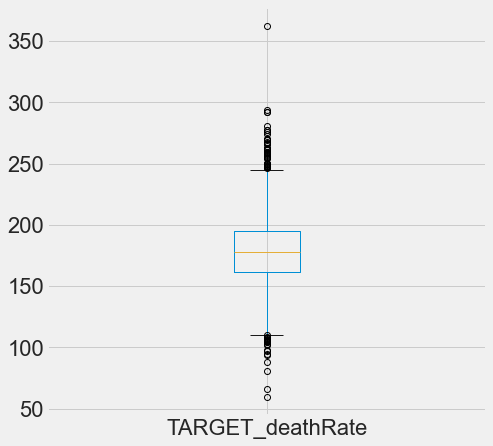

In [11]:
raw_data['TARGET_deathRate'].plot(subplots = True, kind = 'box', layout = (1,1),figsize = [7,7])
plt.show()

There are no outliers in the target variables

Lets check the distributon of the target variable, target deathrate

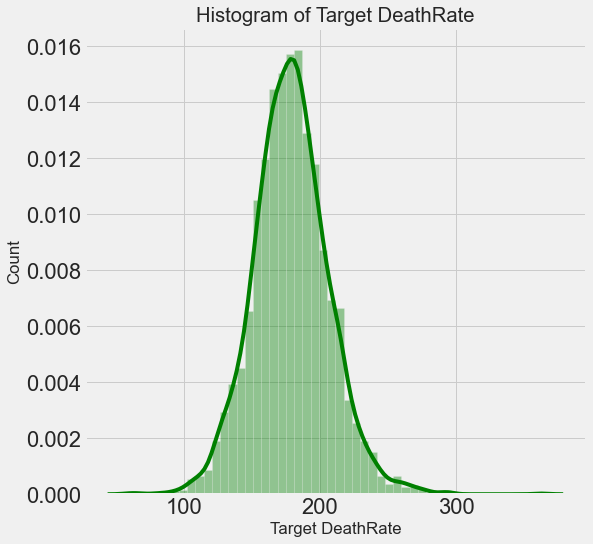

In [12]:
sns.distplot(raw_data['TARGET_deathRate'],color="Green")
plt.xlabel('Target DeathRate')
plt.ylabel('Count')
plt.title('Histogram of Target DeathRate')
plt.show()

Since the target variable is normally distributed, we can directly apply linear regression.

# Bivariate Analysis

Multivariate plots allow us to see relationships between two and more different variables, all in one figure

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


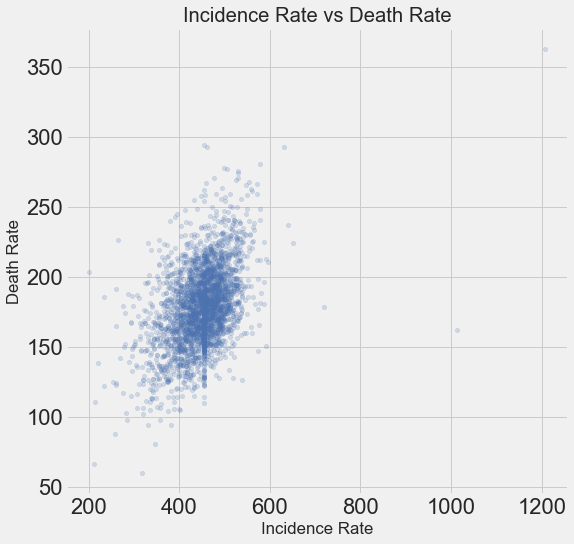

In [13]:
# Scatter Plot

raw_data.plot(kind='scatter', x='incidenceRate', y='TARGET_deathRate', alpha=0.2)
plt.xlabel('Incidence Rate')
plt.ylabel('Death Rate')
plt.title('Incidence Rate vs Death Rate')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


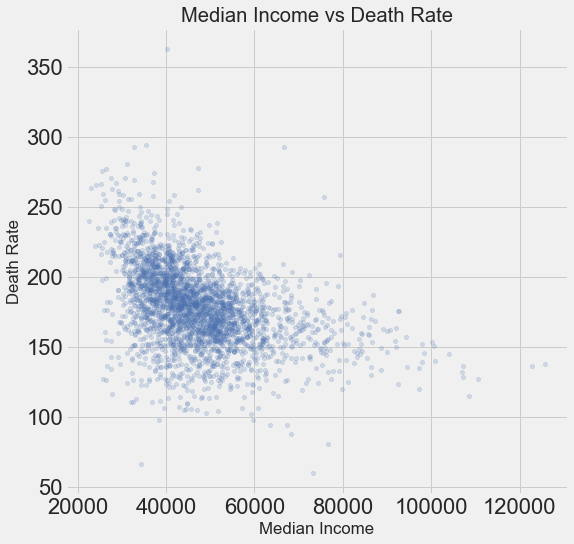

In [14]:
raw_data.plot(kind='scatter', x='medIncome', y='TARGET_deathRate', alpha=0.2)
plt.xlabel('Median Income')
plt.ylabel('Death Rate')
plt.title('Median Income vs Death Rate')
plt.show()


There is a slight negative correlation between cancer death rate and median income.

# Data Preparation

In [15]:
mortality_rate=data.avgDeathsPerYear
incidence_rate=data.incidenceRate 

In [16]:
y= pd.to_numeric(mortality_rate).values
x= data.loc[:,['povertyPercent', 'avgAnnCount', 'avgDeathsPerYear', 'medIncome',
            'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'PercentMarried', 'PctWhite',
            'PctBlack', 'incidenceRate', 'PctAsian', 'PctOtherRace',
            'popEst2015','PctPrivateCoverage','PctPrivateCoverageAlone','PctEmpPrivCoverage',
             'PctPublicCoverage','PctPublicCoverageAlone']]
x.head()

,povertyPercent,avgAnnCount,avgDeathsPerYear,medIncome,MedianAge,MedianAgeMale,MedianAgeFemale,PercentMarried,PctWhite,PctBlack,incidenceRate,PctAsian,PctOtherRace,popEst2015,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone
0,11.2,1397.0,469,61898,39.3,36.9,41.7,52.5,81.780529,2.594728,489.8,4.821857,1.843479,260131,75.1,NaN,41.6,32.9,14.0
1,18.6,173.0,70,48127,33.0,32.2,33.7,44.5,89.228509,0.969102,411.6,2.246233,3.741352,43269,70.2,53.8,43.6,31.1,15.3
2,14.6,102.0,50,49348,45.0,44.0,45.8,54.2,90.922190,0.739673,349.7,0.465898,2.747358,21026,63.7,43.5,34.9,42.1,21.1
3,17.1,427.0,202,44243,42.8,42.2,43.4,52.7,91.744686,0.782626,430.4,1.161359,1.362643,75882,58.4,40.3,35.0,45.3,25.0
4,12.5,57.0,26,49955,48.3,47.8,48.9,57.8,94.104024,0.270192,350.1,0.665830,0.492135,10321,61.6,43.9,35.1,44.0,22.7


# Visualizing the Data

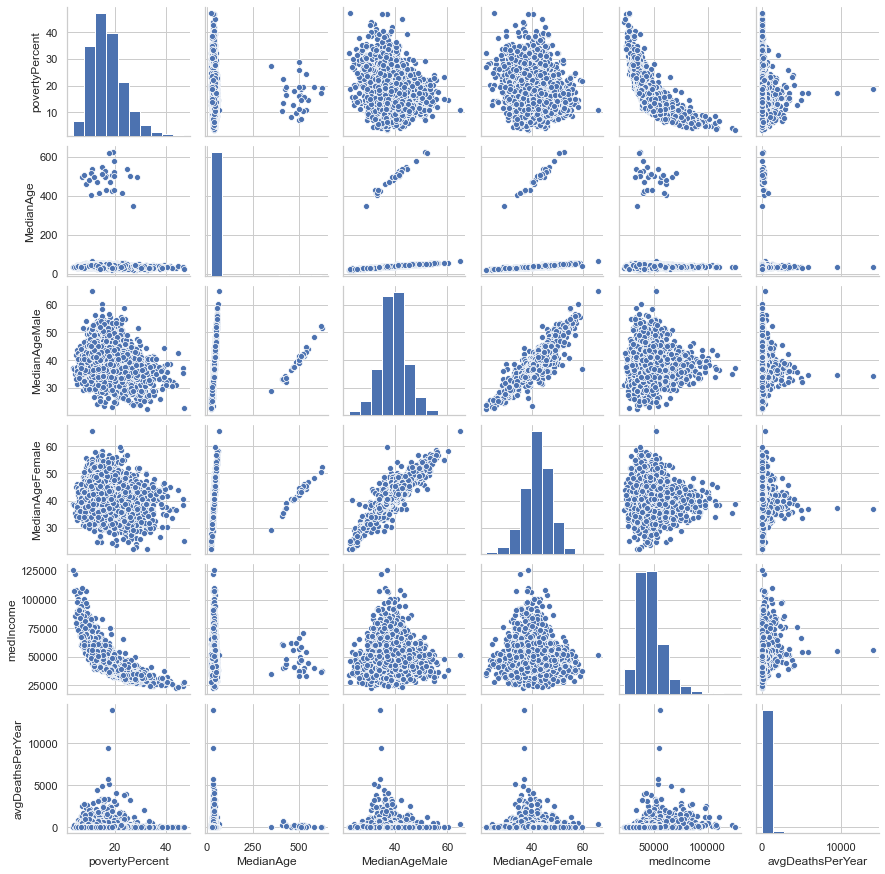

In [17]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(x[['povertyPercent','MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'medIncome','avgDeathsPerYear']], size=2)
plt.show()

# Data Preprocessing

In [18]:
mortality_rate=data.avgDeathsPerYear
incidence_rate=data.incidenceRate 
y= pd.to_numeric(mortality_rate).values
x= data.loc[:,['povertyPercent', 'avgAnnCount', 'avgDeathsPerYear', 'medIncome',
            'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'PercentMarried', 'PctWhite',
            'PctBlack', 'incidenceRate', 'PctAsian', 'PctOtherRace',
            'popEst2015','PctPrivateCoverage','PctPrivateCoverageAlone','PctEmpPrivCoverage',
             'PctPublicCoverage','PctPublicCoverageAlone']]
x.head()

,povertyPercent,avgAnnCount,avgDeathsPerYear,medIncome,MedianAge,MedianAgeMale,MedianAgeFemale,PercentMarried,PctWhite,PctBlack,incidenceRate,PctAsian,PctOtherRace,popEst2015,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone
0,11.2,1397.0,469,61898,39.3,36.9,41.7,52.5,81.780529,2.594728,489.8,4.821857,1.843479,260131,75.1,NaN,41.6,32.9,14.0
1,18.6,173.0,70,48127,33.0,32.2,33.7,44.5,89.228509,0.969102,411.6,2.246233,3.741352,43269,70.2,53.8,43.6,31.1,15.3
2,14.6,102.0,50,49348,45.0,44.0,45.8,54.2,90.922190,0.739673,349.7,0.465898,2.747358,21026,63.7,43.5,34.9,42.1,21.1
3,17.1,427.0,202,44243,42.8,42.2,43.4,52.7,91.744686,0.782626,430.4,1.161359,1.362643,75882,58.4,40.3,35.0,45.3,25.0
4,12.5,57.0,26,49955,48.3,47.8,48.9,57.8,94.104024,0.270192,350.1,0.665830,0.492135,10321,61.6,43.9,35.1,44.0,22.7


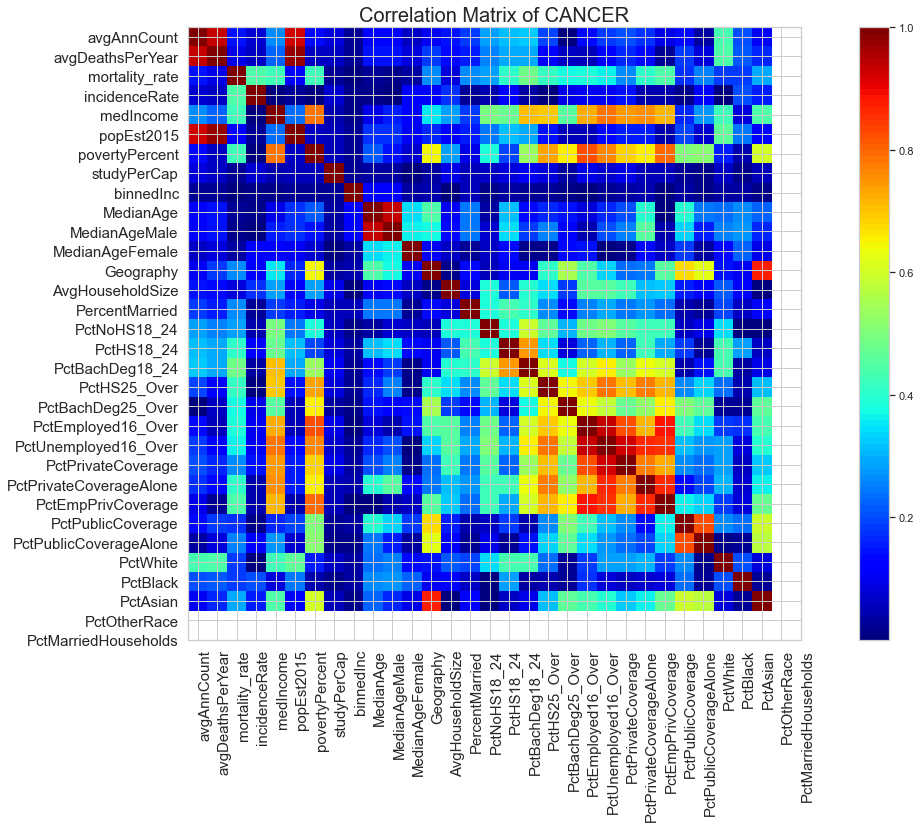

In [19]:
def features_correlation_matrix(data):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax1 = fig.add_subplot(111)
    
    cmap = cm.get_cmap('jet', 100)
    cax = ax1.imshow(data.corr().abs(), interpolation="nearest", \
                     cmap=cmap)
    ax1.grid(True)
    plt.title('Correlation Matrix of CANCER',fontsize=20)
    labels=list(data.columns)
    
    ax1.set_xticks(np.arange(len(labels)))
    ax1.set_yticks(np.arange(len(labels)))
    
    ax1.set_xticklabels(labels,fontsize=15,\
              horizontalalignment="left", rotation='vertical')
    
    ax1.set_yticklabels(labels,fontsize=15)
    
    # Add a colorbar
    fig.colorbar(cax, ticks=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, \
                             0.2, 0.4, 0.6, 0.8, 1])
    plt.show()


# Drop the Outcome column from Df and copy it into df_features
data_features = data.drop(data.columns[-1],axis=1)
# Run the correlation_matrix function, using df_features as argument
features_correlation_matrix(data_features)

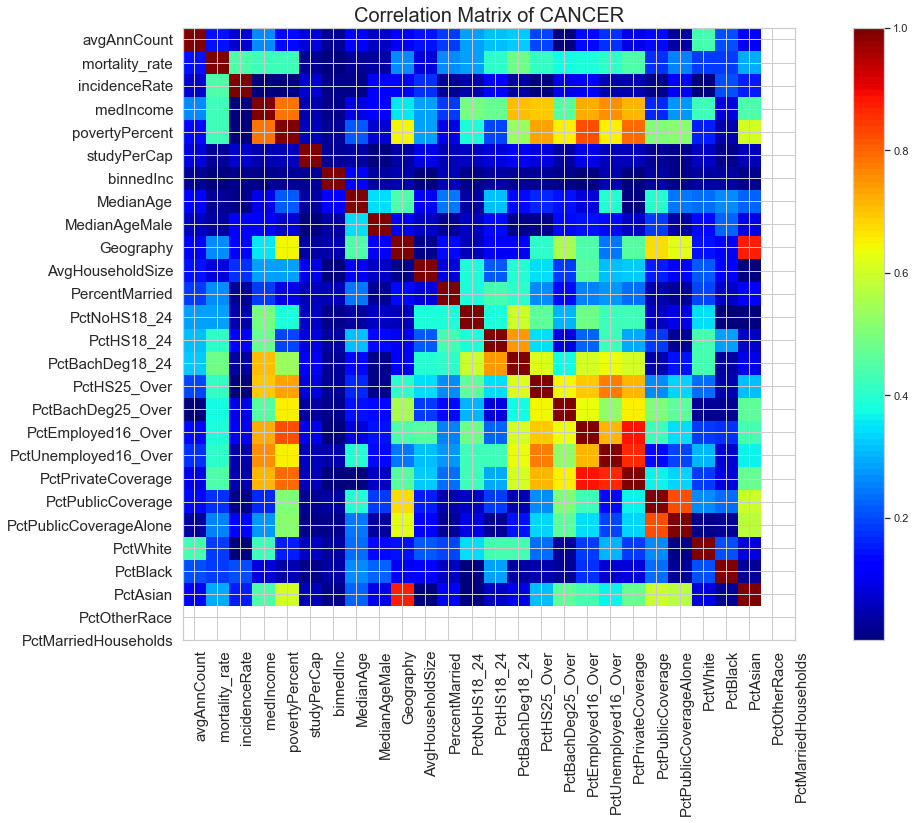

In [20]:
# Dropping of features with a correlation greater than 0.9

# Create the correlation matrix with absolute values
corr_matrix = data_features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
to_drop=[column for column in upper.columns if any(upper[column]>0.9)]
# Drop the redundant features from the data
data_features_corr_dropped = data_features.drop(data_features[to_drop], axis=1)

# Re-plot the dropped df containing only not-redundant features
# Using the feature_correlation_matrix() function
features_correlation_matrix(data_features_corr_dropped)

In [21]:
x.drop(['MedianAgeFemale', 'MedianAgeMale'], axis=1, inplace=True)

In [22]:
cols = ['povertyPercent', 'avgDeathsPerYear', 'medIncome',
            'MedianAge', 
             'incidenceRate', 
            'popEst2015','PctPrivateCoverage',
             'PctPublicCoverage']

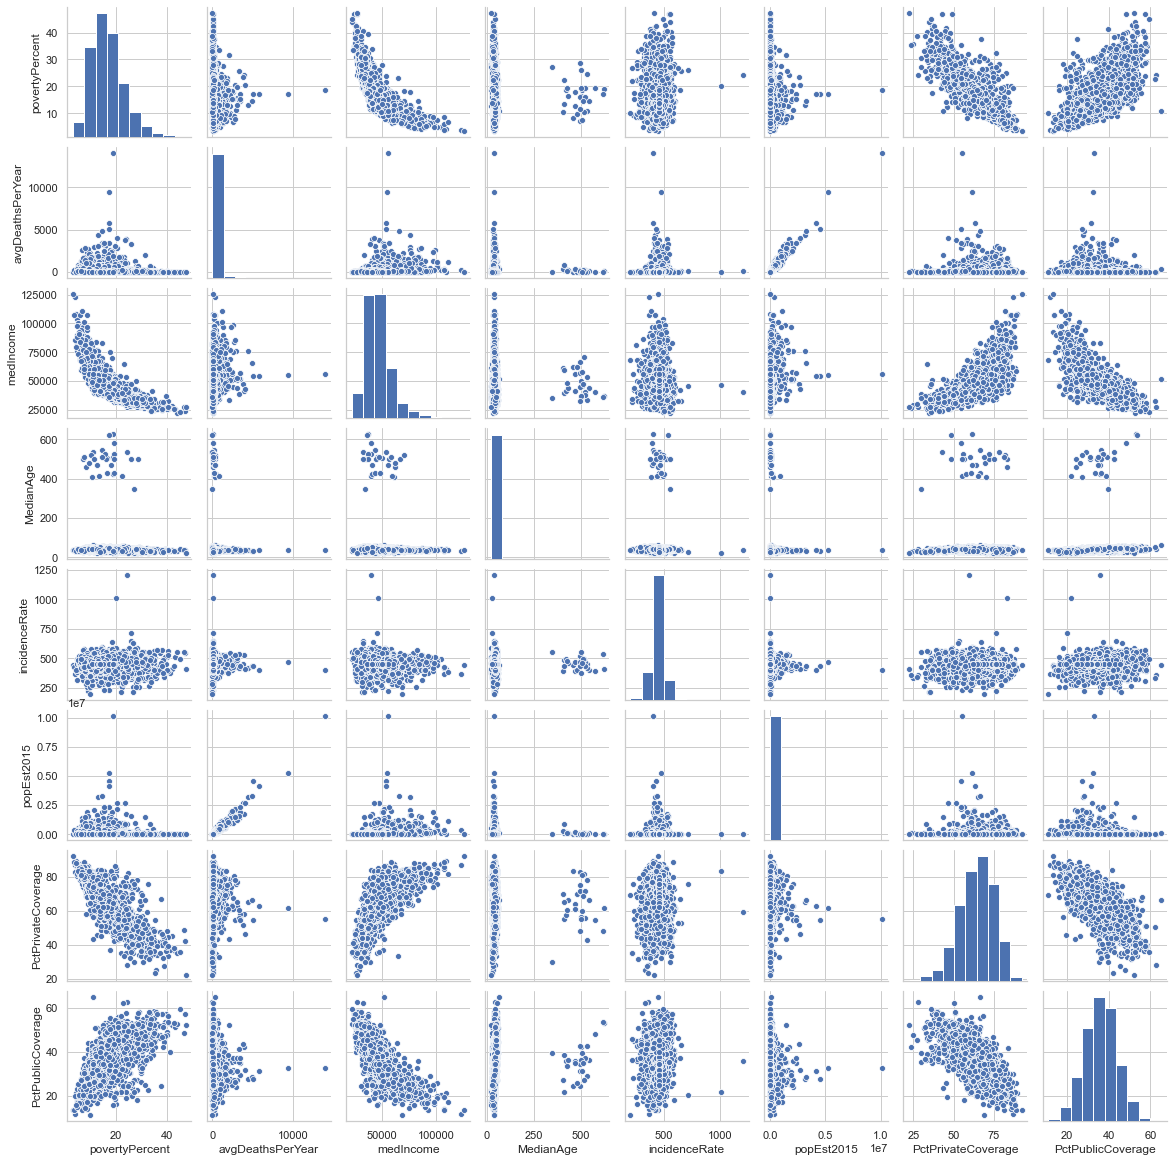

In [23]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(x[cols], size=2)
plt.show()

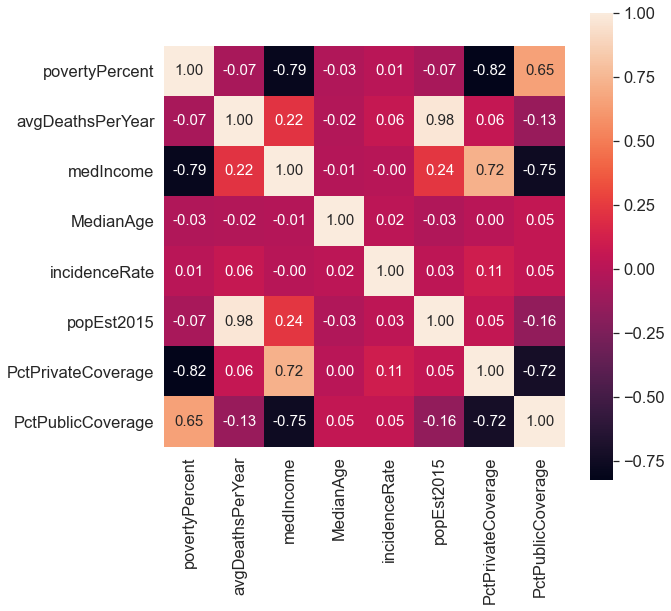

In [24]:
cm = np.corrcoef(x[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15},
                 yticklabels=cols, xticklabels=cols)
plt.show()

From above we conclude that povertyPercent, medIncome, MedianAge, PercentMarried, incidenceRate, PopEst2015, PctPrivateCoverage, PctPublicCoverage are the best suited feature for my model

# Regression Model

In [25]:
x.columns

Index(['povertyPercent', 'avgAnnCount', 'avgDeathsPerYear', 'medIncome',
       'MedianAge', 'PercentMarried', 'PctWhite', 'PctBlack', 'incidenceRate',
       'PctAsian', 'PctOtherRace', 'popEst2015', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone'],
      dtype='object')

In [26]:
cols = ['povertyPercent', 'medIncome',
            'MedianAge', 'PercentMarried', 'incidenceRate',
            'popEst2015','PctPrivateCoverage',
             'PctPublicCoverage']
x= x[cols]
x['Constant'] = 1
x.reset_index(drop=True, inplace=True)

In [27]:
lr = sm.OLS(y, x, hasconst=True)
result = lr.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     9145.
Date:                Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:21:04   Log-Likelihood:                -18375.
No. Observations:                3047   AIC:                         3.677e+04
Df Residuals:                    3038   BIC:                         3.682e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
povertyPercent        -5.8436      0.716     -8.167      0.000      -7.247      -4.441
medIncome             -0.0005      0.000     -1.571      0.116      -0.001       0.000
MedianAge             -0.0370      0.041     -0.914      0.361      -0.116       0.042
PercentMarried        -4.3540      0.382    -11.388      0.000      -5.104      -3.604
incidenceRate          0.2280      0.035      6.506      0.000       0.159       0.297
popEst2015             0.0015   5.96e-06    250.320      0.000       0.001       0.002
PctPrivateCoverage     1.0821      0.346      3.130      0.002       0.404       1.760
PctPublicCoverage      4.1690      0.397     10.496      0.000       3.390       4.948
Constant              57.8691     52.155      1.110      0.267     -44.393     160.131
==============================================================================
Omnibus:                     2300.349   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           886756.899
Skew:                           2.452   Prob(JB):                         0.00
Kurtosis:                      86.430   Cond. No.                     9.86e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
pd.DataFrame([[var, variance_inflation_factor(x.values, x.columns.get_loc(var))] for var in x.columns],
                   index=range(x.shape[1]), columns=['Variable', 'VIF'])

,Variable,VIF
0,povertyPercent,6.304993
1,medIncome,3.976720
2,MedianAge,1.009599
3,PercentMarried,2.084591
4,incidenceRate,1.095890
5,popEst2015,1.154371
6,PctPrivateCoverage,4.062147
7,PctPublicCoverage,2.908482
8,Constant,815.763520


In [29]:
x.columns

Index(['povertyPercent', 'medIncome', 'MedianAge', 'PercentMarried',
       'incidenceRate', 'popEst2015', 'PctPrivateCoverage',
       'PctPublicCoverage', 'Constant'],
      dtype='object')

In [30]:
vcols=['povertyPercent', 'medIncome', 'MedianAge', 'PercentMarried',
       'incidenceRate', 'popEst2015', 'PctPrivateCoverage',
       'PctPublicCoverage', 'Constant',]
xvcols = x[vcols].reset_index(drop=True)
pd.DataFrame([[var, variance_inflation_factor(xvcols.values, xvcols.columns.get_loc(var))] for var in vcols],
                   index=range(len(vcols)), columns=['Variable', 'VIF'])

,Variable,VIF
0,povertyPercent,6.304993
1,medIncome,3.976720
2,MedianAge,1.009599
3,PercentMarried,2.084591
4,incidenceRate,1.095890
5,popEst2015,1.154371
6,PctPrivateCoverage,4.062147
7,PctPublicCoverage,2.908482
8,Constant,815.763520


In [31]:
vcols = ['povertyPercent', 'medIncome', 'MedianAge', 'PercentMarried',
       'incidenceRate', 'popEst2015', 'PctPrivateCoverage',
       'PctPublicCoverage', 'Constant']
xvcols = x[vcols].reset_index(drop=True)
lr = sm.OLS(y, xvcols, hasconst=True)
result = lr.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     9145.
Date:                Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:21:04   Log-Likelihood:                -18375.
No. Observations:                3047   AIC:                         3.677e+04
Df Residuals:                    3038   BIC:                         3.682e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
povertyPercent        -5.8436      0.716     -8.167      0.000      -7.247      -4.441
medIncome             -0.0005      0.000     -1.571      0.116      -0.001       0.000
MedianAge             -0.0370      0.041     -0.914      0.361      -0.116       0.042
PercentMarried        -4.3540      0.382    -11.388      0.000      -5.104      -3.604
incidenceRate          0.2280      0.035      6.506      0.000       0.159       0.297
popEst2015             0.0015   5.96e-06    250.320      0.000       0.001       0.002
PctPrivateCoverage     1.0821      0.346      3.130      0.002       0.404       1.760
PctPublicCoverage      4.1690      0.397     10.496      0.000       3.390       4.948
Constant              57.8691     52.155      1.110      0.267     -44.393     160.131
==============================================================================
Omnibus:                     2300.349   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           886756.899
Skew:                           2.452   Prob(JB):                         0.00
Kurtosis:                      86.430   Cond. No.                     9.86e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""